In [1]:
import pandas as pd
import sys
sys.path.append('../alibi/explainers/counterfactual/')
import counterfactuals
%matplotlib inline

# Load data

### Youtube Spam

In [2]:
path='/Users/Gigio/Desktop/git/interpretable-ml-book/data/TubeSpam.csv'

In [3]:
df = pd.read_csv(path)

In [4]:
print(df.shape)
df.head()

(1956, 5)


,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU,Julius NM,2013-11-07T06:20:48,"Huh, anyway check out this you[tube] channel: ...",1
1,LZQPQhLyRh_C2cTtd9MvFRJedxydaVW-2sNg5Diuo4A,adam riyati,2013-11-07T12:37:15,Hey guys check out my new channel and our firs...,1
2,LZQPQhLyRh9MSZYnf8djyk0gEF9BHDPYrrK-qCczIY8,Evgeny Murashkin,2013-11-08T17:34:21,just for test I have to say murdev.com,1
3,z13jhp0bxqncu512g22wvzkasxmvvzjaz04,ElNino Melendez,2013-11-09T08:28:43,me shaking my sexy ass on my channel enjoy ^_^,1
4,z13fwbwp1oujthgqj04chlngpvzmtt3r3dw,GsMega,2013-11-10T16:05:38,watch?v=vtaRGgvGtWQ Check this out .,1


In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
with tf.Graph().as_default():
    embed = hub.Module("https://tfhub.dev/google/universal-sentence-encoder/2")
    embeddings = embed([
    "The quick brown fox jumps over the lazy dog.",
    "I am a sentence for which I would like to get its embedding"])
with tf.Session() as sess:
    print (sess.run(embeddings))

### Bike sharing

In [5]:
path='/Users/Gigio/Desktop/git/interpretable-ml-book/data/bike-sharing-daily.csv'

In [6]:
df=pd.read_csv(path)

In [7]:
print(df.shape)
df.head()

(731, 16)


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [37]:
X=df[['temp','atemp','hum','windspeed','casual','registered']].values
features_names = ['temp','atemp','hum','windspeed','casual','registered']
y=df['cnt']

In [38]:
from sklearn import svm

In [39]:
model = svm.SVC(gamma='scale',probability=True)

In [40]:
model.fit(X,y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [49]:
x=X[:1]
cf=counterfactuals.CounterFactualAdversarialSearch(model,verbose=True)
cf.fit(X_train=X)

In [50]:
expl_x=cf.explain(x)

Starting minimization with Lambda = 100
24.179702184654396 0.42761273565995167
24.179702184654396 0.7008619322622496
24.179702184654396 0.7466150141266807
24.179702184654396 0.8412932694979397
24.179702184654396 1.3082405651692224
24.179702184654538 0.4277219891075018
24.17970218465436 0.4275752773350772
24.179702184654204 0.42746039887723203
24.179702184654023 0.427345759872018
24.179702184653827 0.4272343695002764
24.179702184653625 0.4271271864727922
24.179702184653408 0.42702162187635945
24.17970218465318 0.4269247219243701
24.179702184652943 0.4268291999988396
24.1797021846527 0.4267435834094368
24.17970218465244 0.42665668825912845
24.17970218465219 0.4265840792363918
24.179702184651894 0.4265035237232557
24.179702184651667 0.42645228091322857
24.179702184651315 0.4263648532520358
24.179702184651223 0.4263660581945546
24.179702184651315 0.46341699812573717
24.17970218465088 0.42625789097686007
24.17970218465068 0.4261894965903767
24.17970218465063 1.3508555408407552
24.1797021846

24.179702120611516 12.601448906102119
24.179702117803384 13.315598099148927
24.179702114935996 14.031280825708548
24.179702112009206 14.746698120223883
24.179702109026167 15.460337920512913
24.179702105986873 16.17104358911963
24.179702102894367 16.8776803821345
24.17970209974861 17.57954121679051
24.179702096552713 18.275755806928238
24.179702093306428 18.965960177858445
24.179702090013116 19.64945013116873
24.17970208667214 20.326148951128346
24.17970208328734 20.995426718015853
24.179702079857353 21.657488518652276
24.179702076386945 22.31166465536615
24.179702072873454 22.958498022210637
24.179702069323337 23.597117271712964
24.179702065731544 24.228556130846208
24.17970206210777 24.85145778747553
24.179702058442317 25.46770236638454
24.17970205475147 26.074871762971508
24.179702051015877 26.676513834989457
24.179702047265994 27.267865053432704
24.179702043461095 27.85607610045634
24.179702039664328 28.430970618260428
24.179702035784093 29.00814910474197
24.179702031964467 29.56410

In [44]:
features_names

['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered']

In [43]:
expl_x-x

array([[-5.28461858e-03,  2.68773862e-02, -8.62689583e-05,
         1.58607881e-05,  2.46446007e+03,  6.49070544e+03]])

### Cervical Cancer

In [8]:
path='/Users/Gigio/Desktop/git/interpretable-ml-book/data/risk_factors_cervical_cancer.csv'

In [9]:
df=pd.read_csv(path)

In [10]:
print(df.shape)
df.head()

(858, 36)


,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,?,?,0,0,0,0,0,0,0,0


### Speed dating

In [11]:
path='/Users/Gigio/Desktop/git/interpretable-ml-book/data/speed_dating_data.csv'

In [12]:
df=pd.read_csv(path,encoding='iso-8859-1')

In [13]:
print(df.shape)
df.head()

(8378, 195)


,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


# Bike sharing analysis

In [14]:
path='/Users/Gigio/Desktop/git/interpretable-ml-book/data/bike-sharing-daily.csv'

In [15]:
df=pd.read_csv(path)

In [16]:
print(df.shape)
df.head()

(731, 16)


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


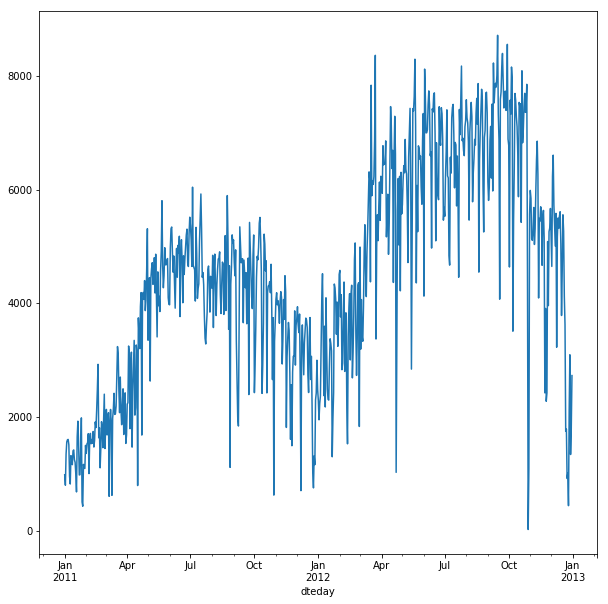

In [17]:
df['dteday'] = pd.to_datetime(df['dteday'])
df.set_index('dteday')['cnt'].plot(figsize=(10,10))

In [18]:
df.corr()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,0.412224,0.866025,0.496702,0.016145,-0.000016,-0.004337,-0.021477,0.150580,0.152638,0.016375,-0.112620,0.275255,0.659623,0.628830
season,0.412224,1.000000,-0.001844,0.831440,-0.010537,-0.003080,0.012485,0.019211,0.334315,0.342876,0.205445,-0.229046,0.210399,0.411623,0.406100
yr,0.866025,-0.001844,1.000000,-0.001792,0.007954,-0.005461,-0.002013,-0.048727,0.047604,0.046106,-0.110651,-0.011817,0.248546,0.594248,0.566710
mnth,0.496702,0.831440,-0.001792,1.000000,0.019191,0.009509,-0.005901,0.043528,0.220205,0.227459,0.222204,-0.207502,0.123006,0.293488,0.279977
holiday,0.016145,-0.010537,0.007954,0.019191,1.000000,-0.101960,-0.253023,-0.034627,-0.028556,-0.032507,-0.015937,0.006292,0.054274,-0.108745,-0.068348
weekday,-0.000016,-0.003080,-0.005461,0.009509,-0.101960,1.000000,0.035790,0.031087,-0.000170,-0.007537,-0.052232,0.014282,0.059923,0.057367,0.067443
workingday,-0.004337,0.012485,-0.002013,-0.005901,-0.253023,0.035790,1.000000,0.061200,0.052660,0.052182,0.024327,-0.018796,-0.518044,0.303907,0.061156
weathersit,-0.021477,0.019211,-0.048727,0.043528,-0.034627,0.031087,0.061200,1.000000,-0.120602,-0.121583,0.591045,0.039511,-0.247353,-0.260388,-0.297391
temp,0.150580,0.334315,0.047604,0.220205,-0.028556,-0.000170,0.052660,-0.120602,1.000000,0.991702,0.126963,-0.157944,0.543285,0.540012,0.627494
atemp,0.152638,0.342876,0.046106,0.227459,-0.032507,-0.007537,0.052182,-0.121583,0.991702,1.000000,0.139988,-0.183643,0.543864,0.544192,0.631066


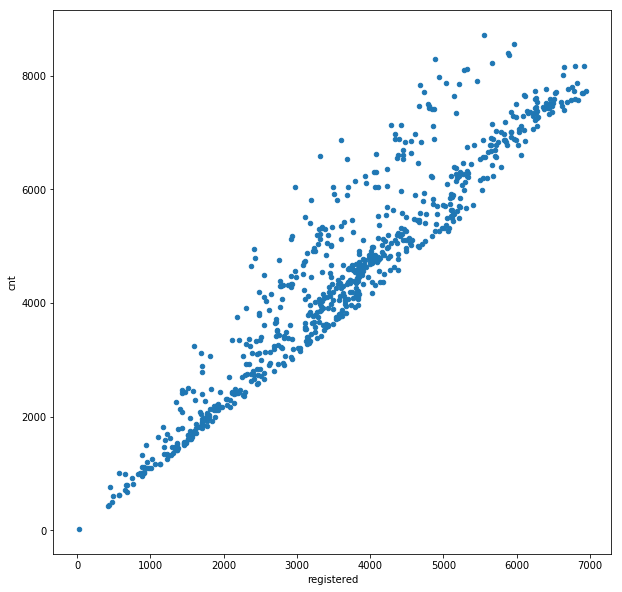

In [19]:
df.plot.scatter(x='registered',y='cnt',figsize=(10,10))

---

# ACDC

In [19]:
path = '/Users/Gigio/Downloads/Homicide age adjusted indicator LIVE -05 20100919.xlsx'

In [36]:
df = pd.read_excel(path)

In [37]:
df.set_index('Murder per 100,000, age adjusted',inplace=True)

In [50]:
df.T.mean(axis=0).sort_values(ascending=False)

Murder per 100,000, age adjusted
South Africa              62.433503
Cote d'Ivoire             52.664928
Colombia                  49.764058
Angola                    49.156545
Sierra Leone              46.758267
El Salvador               42.141544
Congo, Dem. Rep.          39.199813
Burundi                   37.663428
Central African Rep.      33.563876
Uganda                    33.292486
Virgin Islands (U.S.)     32.673667
Tanzania                  32.213649
Sudan                     31.690875
Rwanda                    31.385489
Zimbabwe                  29.672565
Guatemala                 28.761544
Liberia                   28.182550
Jamaica                   26.482738
Ethiopia                  25.929682
Belize                    24.420968
Niger                     24.265238
Equatorial Guinea         24.165756
Honduras                  23.906859
Nigeria                   23.848141
Mexico                    23.747607
Guinea                    23.527799
Kenya                     22.56

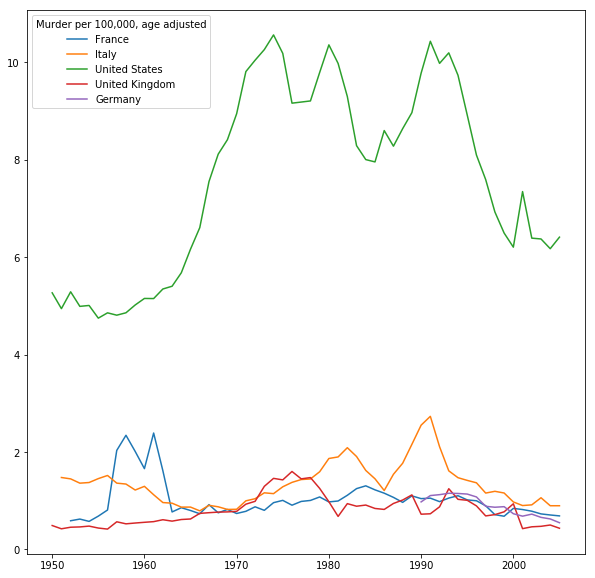

In [56]:
df.T[['France','Italy','United States','United Kingdom', 'Germany']].plot(figsize=(10,10))